In [1]:
#importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.models import Sequential

In [2]:
#importing the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#printing training data
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#printing training data
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#dividing the data into training and testing
x_train = train.drop('label', axis = 1)
y_train = train['label']
x_test = test

In [6]:
#printing the shapes
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(42000, 784)
(28000, 784)
(42000,)


In [7]:
#normalizing the data by dividing 255
x_train = x_train / 255
x_test = x_test / 255

In [8]:
#building the model
model = Sequential([
    Dense(100, input_shape = (784,), activation= 'relu'),
    Dense(10, activation= 'sigmoid')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
#fitting training data into the model
model.fit(x_train, y_train, epochs = 5)

Epoch 1/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.3057 - accuracy: 0.9136
Epoch 2/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1397 - accuracy: 0.9595
Epoch 3/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0960 - accuracy: 0.9710
Epoch 4/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0733 - accuracy: 0.9773
Epoch 5/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0573 - accuracy: 0.9824
Epoch 6/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0455 - accuracy: 0.9865
Epoch 7/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0366 - accuracy: 0.9886
Epoch 8/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0300 - accuracy: 0.9911
Epoch 9/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0240 - accuracy: 0.9927
Epoch 10/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.019

In [10]:
pred = model.predict(x_test)

875/875 [==============================] - 2s 2ms/step


In [11]:
pred[0]

array([4.0342320e-06, 1.6015551e-06, 1.0000000e+00, 3.4802334e-04,
       7.6776311e-02, 5.2591655e-09, 3.0288717e-03, 3.6146212e-02,
       1.1532328e-03, 8.1268707e-09], dtype=float32)

In [12]:
np.argmax(pred[0])

2

In [13]:
y_pred = [np.argmax(element) for element in pred]

In [14]:
#20 predicted output for the testing data
y_pred[:20]

[2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0]

In [15]:
x_test = x_test.values.reshape(-1, 28, 28, 1)
x_train = x_train.values.reshape(-1, 28, 28, 1)

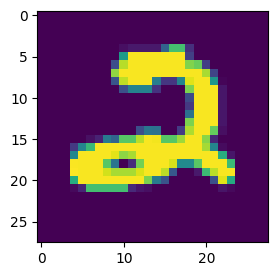

In [16]:
plt.figure(figsize = (4,3))
plt.imshow(x_test[0])
plt.show()

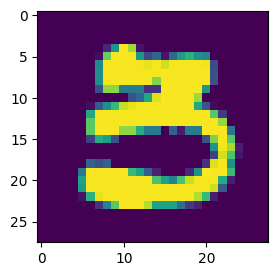

In [17]:
plt.figure(figsize = (4,3))
plt.imshow(x_test[15])
plt.show()

In [18]:
x_train.shape

(42000, 28, 28, 1)

In [19]:
#building the convolutional model
model1 = Sequential([
    Conv2D(filters = 32, kernel_size = (5,5), activation ='relu', input_shape = (28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100, activation= 'relu'),
    Dense(10, activation= 'sigmoid')
])
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
#y_train = to_categorical(y_train, num_classes = 10)

In [21]:
#fitting the data into convolution model
model1.fit(x_train, y_train, epochs = 5)

Epoch 1/10
1313/1313 [==============================] - 24s 18ms/step - loss: 0.1576 - accuracy: 0.9533
Epoch 2/10
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0498 - accuracy: 0.9848
Epoch 3/10
1313/1313 [==============================] - 23s 18ms/step - loss: 0.0333 - accuracy: 0.9892
Epoch 4/10
1313/1313 [==============================] - 23s 18ms/step - loss: 0.0237 - accuracy: 0.9922
Epoch 5/10
1313/1313 [==============================] - 23s 17ms/step - loss: 0.0168 - accuracy: 0.9946
Epoch 6/10
1313/1313 [==============================] - 23s 17ms/step - loss: 0.0121 - accuracy: 0.9962
Epoch 7/10
1313/1313 [==============================] - 23s 17ms/step - loss: 0.0104 - accuracy: 0.9966
Epoch 8/10
1313/1313 [==============================] - 23s 17ms/step - loss: 0.0075 - accuracy: 0.9977
Epoch 9/10
1313/1313 [==============================] - 23s 17ms/step - loss: 0.0069 - accuracy: 0.9977
Epoch 10/10
1313/1313 [==============================] - 23s 17m

In [22]:
pred1 = model1.predict(x_test)

875/875 [==============================] - 5s 6ms/step


In [23]:
y_pred1 = [np.argmax(element) for element in pred1]

In [24]:
y_pred1[:20]

[2, 0, 9, 0, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0]